fake/real path: /Users/ashley1/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1
Contents of fake/real path: ['Fake.csv', 'True.csv']
ai1 path: /Users/ashley1/.cache/kagglehub/datasets/walidbenaouda/ai-isot-dataset/versions/1
Contents of ai1 path: ['AI-ISOT dataset.csv']
ai2 path: /Users/ashley1/.cache/kagglehub/datasets/atharvasoundankar/gen-ai-misinformation-detection-datase-20242025/versions/1
Contents of ai2 path: ['generative_ai_misinformation_dataset.csv']
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairm

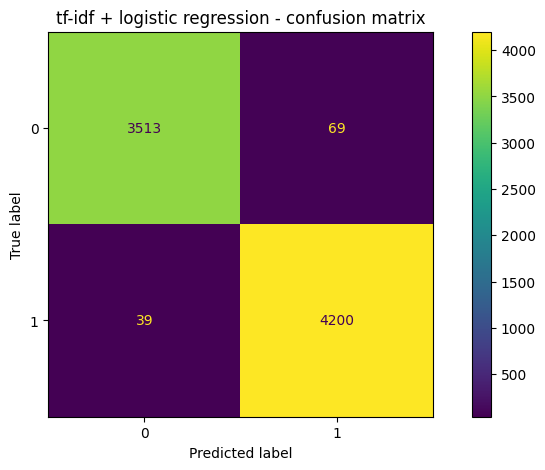

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END clf__C=0.01, clf__class_weight=None, vec__min_df=2, vec__ngram_range=(1, 1); total time=   7.3s
[CV] END clf__C=0.01, clf__class_weight=None, vec__min_df=2, vec__ngram_range=(1, 1); total time=   6.9s
[CV] END clf__C=0.01, clf__class_weight=None, vec__min_df=2, vec__ngram_range=(1, 1); total time=   7.2s
[CV] END clf__C=0.01, clf__class_weight=balanced, vec__min_df=2, vec__ngram_range=(1, 1); total time=   7.2s
[CV] END clf__C=0.01, clf__class_weight=balanced, vec__min_df=2, vec__ngram_range=(1, 1); total time=   7.2s
[CV] END clf__C=0.01, clf__class_weight=balanced, vec__min_df=2, vec__ngram_range=(1, 1); total time=   7.2s

=== bow + logistic regression ===
best bow params: {'clf__C': 0.01, 'clf__class_weight': 'balanced', 'vec__min_df': 2, 'vec__ngram_range': (1, 1)}
best cv score: 0.9919797011414045

bow logistic regression - test set report
              precision    recall  f1-score   support

           0       

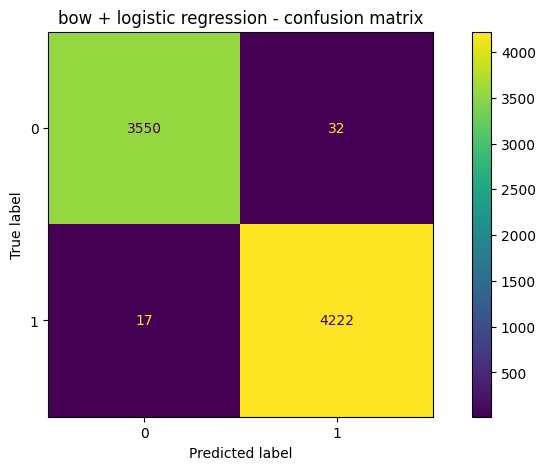

        date  label      month
0 2017-12-31      0 2017-12-01
1 2017-12-31      0 2017-12-01
2 2017-12-30      0 2017-12-01
3 2017-12-29      0 2017-12-01
4 2017-12-25      0 2017-12-01
Index(['date', 'label', 'month'], dtype='object')
       month  label  count
0 2015-05-01      0    209
1 2016-01-01      0    672
2 2016-02-01      0    661
3 2016-03-01      0    638
4 2016-04-01      0    585


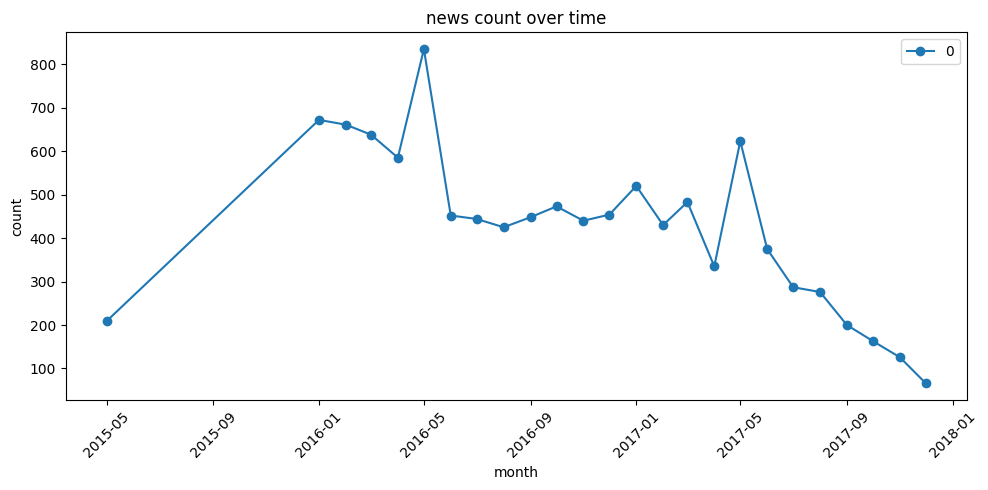

       month         region  label  count
1 2024-01-01  International      1     11
3 2024-01-01             US      1      3
5 2024-02-01  International      1     13
7 2024-02-01             US      1      3
9 2024-03-01  International      1     12


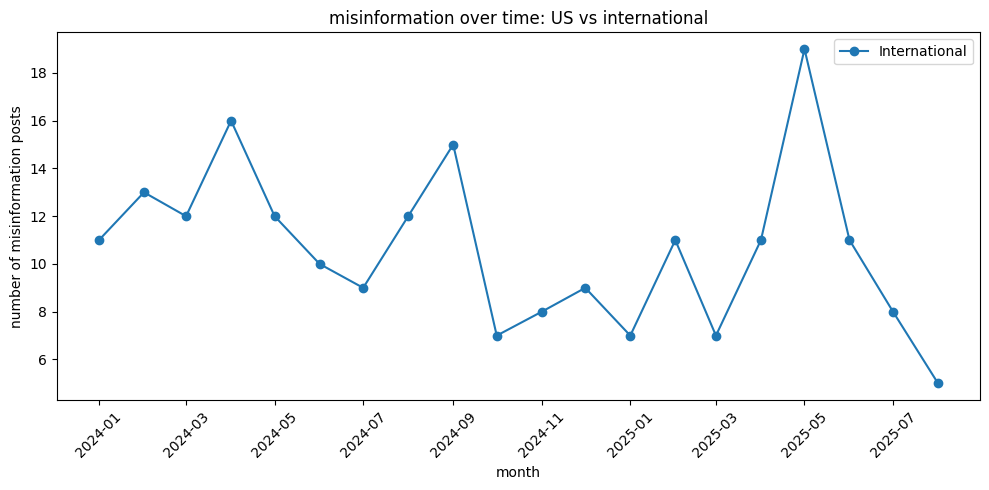

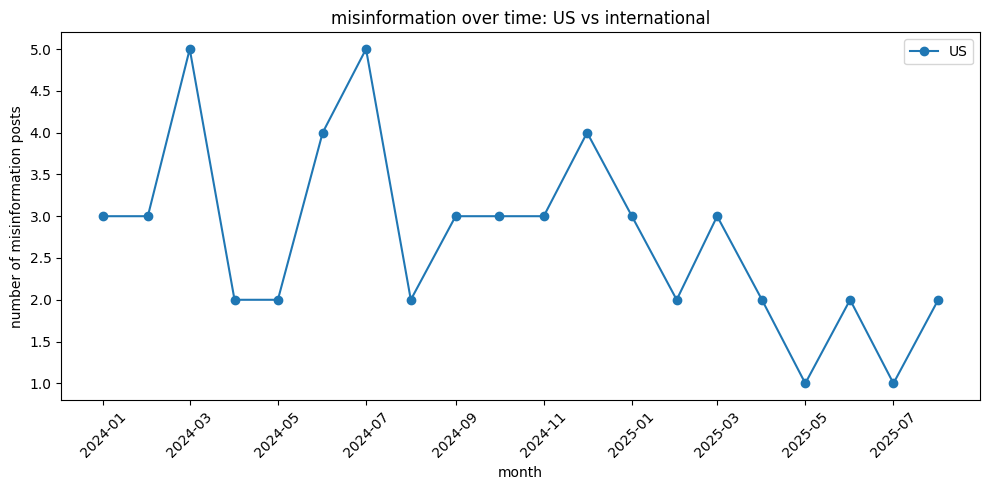

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 64.5 MB/s  0:00:00m0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=fbeb49aa40a1387bb81870aacfb3ed7c6307cb004811ab62af4da21b94d07de7
  Stored in directory: /Users/ashley1/Library/Caches/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [lime]3/5 [scikit-image]
class names for lime: ['0', '1']
=== TEXT EXAMPLE ==
watch journalist kicked out of world’s largest gun show for asking this totally valid question video wednesday, january 22 was the day of the world s largest gun show. held in las vegas, nevada, the shot show shooting, hunting, and outdoor trade is where arms dealers gather to sh

saved lime explanation to lime_example_1.html


In [4]:
import kagglehub #import module
import pandas as pd #import module
import os #import module
import re #import module
import numpy as np #import module

from sklearn.model_selection import train_test_split, GridSearchCV #import module
from sklearn.pipeline import Pipeline #import module
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #import module
from sklearn.linear_model import LogisticRegression #import module
from sklearn.metrics import classification_report, ConfusionMatrixDisplay #import module
import matplotlib.pyplot as plt #import module

plt.rcParams["figure.figsize"] = (10, 5) #sets parameters 

#download dataset
path_fake_real = kagglehub.dataset_download(
    "clmentbisaillon/fake-and-real-news-dataset"
)

#shows where dataset was downloaded in folder
print("fake/real path:", path_fake_real)
print("Contents of fake/real path:", os.listdir(path_fake_real))

#download dataset
path_ai1 = kagglehub.dataset_download(
    "walidbenaouda/ai-isot-dataset"
) 

#shows where dataset was downloaded in folder
print("ai1 path:", path_ai1)
print("Contents of ai1 path:", os.listdir(path_ai1))

#download dataset
path_ai2 = kagglehub.dataset_download(
    "atharvasoundankar/gen-ai-misinformation-detection-datase-20242025"
)

#shows where dataset was downloaded in folder
print("ai2 path:", path_ai2)
print("Contents of ai2 path:", os.listdir(path_ai2))

fake = pd.read_csv(os.path.join(path_fake_real, "Fake.csv")) #cvs for fake
true = pd.read_csv(os.path.join(path_fake_real, "True.csv")) #cvs for true

#cvs for Ai misinformation 
ai = pd.read_csv(os.path.join(
    path_ai2,
    "generative_ai_misinformation_dataset.csv"
))

print(fake.head()) #shows headers for fake 
print(true.head()) #shows headers for true
print(ai.head()) #shows headers for AI misinformation

#cleans text in dataset
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text) #gets rid of urls
    text = re.sub(r"<.*?>", "", text) #gets rid of html
    text = re.sub(r"[^a-zA-Z0-9.,!?'’\s]", " ", text) #makes sure punctuation still there
    text = re.sub(r"\s+", " ", text).strip() #fixes spaces
    return text

fake["label"] = 0 #gives fake news a label
true["label"] = 1 #gives true news a label

df_rf = pd.concat([fake, true], ignore_index=True) #combines datasets

#makes text in one place
df_rf["text"] = (
    df_rf["title"].fillna("") + " " +
    df_rf["text"].fillna("")
).str.strip()

#gets rid of duplicates
#gets rid of empty text
df_rf = df_rf.drop_duplicates(subset=["text"])
df_rf = df_rf.dropna(subset=["text"])
df_rf = df_rf[df_rf["text"].str.strip() != ""]

#cleans the text
df_rf["text"] = df_rf["text"].apply(clean_text)

#picks the necessary columns
df_rf_clean = df_rf[["text", "label"]]

#saves the cleaned file
df_rf_clean.to_csv("clean_real_fake.csv", index=False)

#shows it was saved
print("saved: clean_real_fake.csv")

#shows headers of cleaned dataset
df_rf_clean.head()

#picks the necessary columns
ai = ai[["text", "is_misinformation", "timestamp", "country"]].copy()

#renames columns
ai = ai.rename(columns={"is_misinformation": "label"})

#gets rid of duplicates
#gets rid of empty text
ai = ai.drop_duplicates(subset=["text"])
ai = ai.dropna(subset=["text"])
ai = ai[ai["text"].str.strip() != ""]

#cleans the text
ai["text"] = ai["text"].apply(clean_text)

#saves the cleaned file
ai.to_csv("clean_ai_human.csv", index=False)

#shows it was saved
print("saved: clean_ai_human.csv")

#shows headers of cleaned dataset
ai.head()

#uses copy of cleaned dataset for training
df = df_rf_clean.copy()

X = df["text"] #labels features from article text
y = df["label"] #labels target for fake and real 

#splits into the sets for train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.2,
    random_state=42,
    stratify=y
)

#changes text to tf-idf & logistic regression
tfidf_log_reg_pipeline = Pipeline([
    ("vec", TfidfVectorizer(
        stop_words="english",
        max_df=.9
    )),
    ("clf", LogisticRegression(
        max_iter=500,
        n_jobs=-1
    ))
])

#setting parameters for what we are searching for
tfidf_param_grid = {
    "vec__ngram_range": [(1, 1), (1, 2)],
    "clf__C": [.01, 1]
}

#how the search actually works 
tfidf_grid = GridSearchCV(
    tfidf_log_reg_pipeline,
    param_grid=tfidf_param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=1,
    verbose=2
)

#runs the gridsearch 
tfidf_grid.fit(X_train, y_train)

#shows best hyperparameters
print("\n=== tf-idf + logistic regression ===")
print("best tf-idf params:", tfidf_grid.best_params_)
print("best cv score:", tfidf_grid.best_score_)

#sets prediction labels for test set 
y_pred_tfidf = tfidf_grid.predict(X_test)
print("\ntf-idf logistic regression - test set report")
print(classification_report(y_test, y_pred_tfidf))

#makes confusion matrix plot 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tfidf)
plt.title("tf-idf + logistic regression - confusion matrix")
plt.show()

#bow & logisic regression 
bow_log_reg_pipeline = Pipeline([
    ("vec", CountVectorizer(
        stop_words="english",
        max_df=.9
    )),
    ("clf", LogisticRegression(
        max_iter=500,
        n_jobs=-1
    ))
])

#setting parameters for what we are searching for
bow_param_grid = {
    "vec__ngram_range": [(1, 1)],
    "vec__min_df": [2],
    "clf__C": [.01],
    "clf__class_weight": [None, "balanced"]
}

#how the search actually works 
bow_grid = GridSearchCV(
    bow_log_reg_pipeline,
    param_grid=bow_param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=1,
    verbose=2
)

#runs gridsearch for bow model 
bow_grid.fit(X_train, y_train)

#shows best hyperparameters
print("\n=== bow + logistic regression ===")
print("best bow params:", bow_grid.best_params_)
print("best cv score:", bow_grid.best_score_)

#sets prediction labels for test set 
y_pred_bow = bow_grid.predict(X_test)
print("\nbow logistic regression - test set report")
print(classification_report(y_test, y_pred_bow))

#shows confusion matrix graph 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bow)
plt.title("bow + logistic regression - confusion matrix")
plt.show()

#gets date & label columns in real/fake dataset
df_trend = df_rf[["date", "label"]].copy()

#gets rid of duplicates
#gets rid of empty text
df_trend["date"] = pd.to_datetime(
    df_trend["date"],
    errors="coerce",
    dayfirst=True
)

#gets rid of rows where date isn't readable 
df_trend = df_trend.dropna(subset=["date"])

#groups dates by first of month 
df_trend["month"] = df_trend["date"].dt.to_period("M").dt.to_timestamp()

#shows headers and columns 
print(df_trend.head())
print(df_trend.columns)

#groups by month & labels 
trend_over_time = (
    df_trend.groupby(["month", "label"])   # <-- FIX
        .size()
        .reset_index(name="count")
)

#shows headers  
print(trend_over_time.head())

#makes linechart for news count over time 
plt.figure(figsize=(10, 5))
for lab in trend_over_time["label"].unique():
    subset = trend_over_time[trend_over_time["label"] == lab]
    plt.plot(subset["month"], subset["count"], marker="o", label=str(lab))

plt.title("news count over time") #titles chart
plt.xlabel("month") #labels xaxis
plt.ylabel("count") #labels yaxis
plt.legend() #makes legend
plt.xticks(rotation=45) #adjusts month labels
plt.tight_layout() #adjusts layout
plt.show() #shows linechart

#makes ai_trend with labels from cleaned dataset
ai_trend = ai[["timestamp", "country", "label"]].copy()

#gets timestamps 
ai_trend["timestamp"] = pd.to_datetime(ai_trend["timestamp"])

#gets dates
ai_trend["date"] = ai_trend["timestamp"].dt.date

#changes back to datetime
ai_trend["date"] = pd.to_datetime(ai_trend["date"])

#makes groupings by month
ai_trend["month"] = ai_trend["date"].dt.to_period("M").dt.to_timestamp()

#sets patameters 
def is_us_country(x):
    if isinstance(x, str):
        x_upper = x.upper()
        return ("USA" in x_upper) or ("UNITED STATES" in x_upper) or (x_upper == "US")
    return False

#makes region as US & international 
ai_trend["region"] = np.where(ai_trend["country"].apply(is_us_country),
                              "US", "International")

#makes region, month & labels 
#finds number of posts 
#counts the found total 
region_trend = (
    ai_trend.groupby(["month", "region", "label"])
            .size()
            .reset_index(name="count")
)

#shows headers
print(region_trend.head()) 

#keeps only misinformation posts labeled 
misinfo_region_trend = region_trend[region_trend["label"] == 1]

#shows headers
print(misinfo_region_trend.head())

#makes linechart for time series based on region 
plt.figure(figsize=(10, 5))
for region in misinfo_region_trend["region"].unique():
  subset = misinfo_region_trend[misinfo_region_trend["region"] == region]
  plt.plot(subset["month"], subset["count"], marker="o", label=region)


plt.title("misinformation over time: US vs international") #titles chart
plt.xlabel("month") #labels xaxis
plt.ylabel("number of misinformation posts") #labels yaxis 
plt.legend() #makes legend
plt.xticks(rotation=45) #adjusts month labels
plt.tight_layout() #adjusts layout
plt.show() #shows linegraph 

#installs lime 
!pip install lime

from lime.lime_text import LimeTextExplainer #import module 

#gets best model from tf-idf from gridsearch 
best_model = tfidf_grid.best_estimator_

#sort labels listed in training data 
label_values = sorted(y_train.unique())

#change labels to strings for lime 
class_names = [str(l) for l in label_values]

#shows class names for lime 
print("class names for lime:", class_names)

#makes lime explainer 
explainer = LimeTextExplainer(class_names=class_names)

#picks text example to explain 
idx = 10

#text of data 
text_instance = X_test.iloc[idx]

#true label 
true_label = y_test.iloc[idx]

#shows text from article 
#shows true label 
#shows models predicted label 
print("=== TEXT EXAMPLE ==")
print(text_instance)
print("\ntrue label:", true_label)
print("model prediction:", best_model.predict([text_instance])[0])

#text we want to explain 
exp = explainer.explain_instance(
    text_instance,
    best_model.predict_proba,
    num_features=10,
    top_labels=1
)

#shos explanation with highlighted words
exp.show_in_notebook(text=True)

#saves file as html 
exp.save_to_file("lime_example_1.html")

#shows file has been saved 
print("saved lime explanation to lime_example_1.html")